## Definition & Working principle

Linear regression is a supervised learining algorithm used when target / dependent variable continues real number. It establishes relationship between dependent variable $y$ and one or more independent variable $x$ using best fit line. It work on the principle of ordinary least square $(OLS)$ / Mean square errror $(MSE)$. In statistics ols is method to estimated unkown parameter of linear regression function, it's goal is to minimize sum of square difference between observed dependent variable in the given data set and those predicted by linear regression fuction.

Xi is used to represent the independent variables.<br/>
Yi is used to represent the dependent variable.<br/>
Linear regression is a supervised learining algorithm used when target / dependent variable continues real number. It establishes relationship between dependent variable $y$ and one or more independent variable $x$ using best fit line. It work on the principle of ordinary least square $(OLS)$ / Mean square errror $(MSE)$. In statistics ols is method to estimated unkown parameter of linear regression function, it's goal is to minimize sum of square difference between observed dependent variable in the given data set and those predicted by linear regression fuction.<br/>
<br/>
hθ(xi)=θ0+θ1xi

$\mathbf{\theta_0,\theta_1}$ are parameter of hypothesis.This is equation for Simple / Univariate Linear regression.

For Multiple Linear regression more than one independent variable exist then we will use $\mathbf{x_{ij}}$ to denote indepedent variable and $\mathbf{y_{i}}$ to denote dependent variable. We have $\mathbf{n}$ independent variable then $\mathbf{j=1,2,3 ..... n}$. The hypothesis function represented as<br/>
<br/>
hθ(xi)=θ0+θ1xi1+θ2xi2+.....θjxij......θnxmn<br/><br/>
$\mathbf{\theta_0,\theta_1,....\theta_j....\theta_n }$ are parameter of hypothesis, $\mathbf{m}$ Number of training examples, $\mathbf{n}$ Number of independent variable, $\mathbf{x_{ij}}$ is $\mathbf{i^{th}}$ training example of $\mathbf{j^{th}}$ feature.

Bold Symbols in LaTeX:
If you want bold math symbols, use \mathbf{} with $ symbol both sides

##### We will build a Linear regression model for Medical cost dataset. The dataset consists of age, sex, BMI(body mass index), children, smoker and region feature, which are independent and charge as a dependent feature. We will predict individual medical costs billed by health insurance.

In [1]:
# Import library
import pandas  as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from IPython.display import Image, display



In [2]:
# Import dataset
df = pd.read_csv(r"F:\IIITBangloreAIML\7. Linear Regression Using Python\ClassLinearRegressionComplete\Datasets\insurance.csv")

In [3]:
# checking the shape of the dataset
df.shape

(1338, 7)

In [4]:
# our dataset has 1338 rows and 7 columns

In [5]:
# checking the first 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# checking the last five columns
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


Now we have import dataset. When we look at the shape of dataset it has return as (1338,7).So there are $\mathbf{m=1338}$ training exaple and $\mathbf{n=7}$ independent variable. The target variable here is charges and remaining six variables such as age, sex, bmi, children, smoker, region are independent variable. There are multiple independent variable, so we need to fit Multiple linear regression. Then the hypothesis function looks like


#### hθ(xi)=θ0+θ1age+θ2sex+θ3bmi+θ4children+θ5smoker+θ6region

This multiple linear regression equation for given dataset.
If $\mathbf{i=1}$ then

#### hθ(x1)=θ0+θ119+θ2female+θ327.900+θ41+θ5yes+θ6southwest<br/> 
#### y1=16884.92400

---

If $\mathbf{i=3}$ then<br/>
#### hθ(x3)=θ0+θ128+θ2male+θ333.000+θ43+θ5no+θ6northwest<br/> 
#### y3=4449.46200

<Figure size 2000x1200 with 0 Axes>

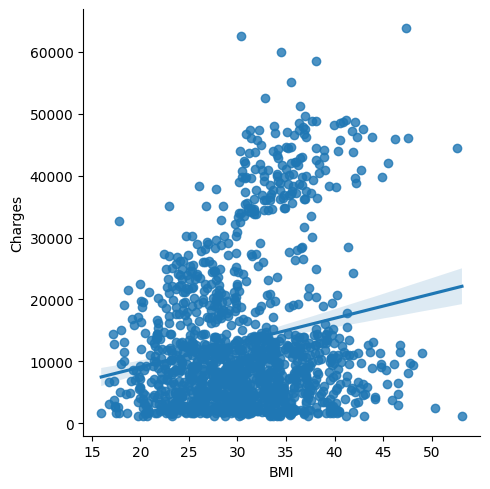

In [7]:
## fit line using seaborn library only for bmi as independent variable and charges as dependent variable
## lmplot is a function from Seaborn, a Python data visualization library. It is used to plot linear relationships between two variables with regression lines.
plt.figure(figsize=(20,12))
sns.lmplot(data = df,x='bmi',y='charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

In [8]:
# the regression plot will look like above if we use BMI as our only Independent Feature and Charges as our Dependent Feature

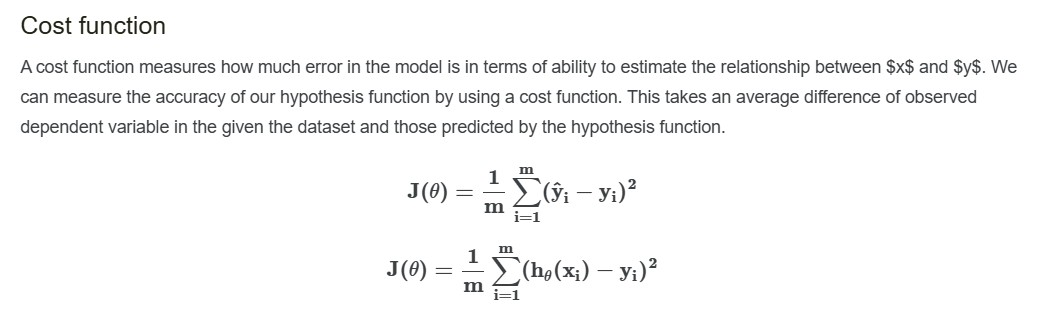

In [9]:
display(Image(r"F:\IIITBangloreAIML\7. Linear Regression Using Python\ClassLinearRegressionComplete\LR1.jpg"))

### Exploratory Data Analysis

In [10]:
# statistical information
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


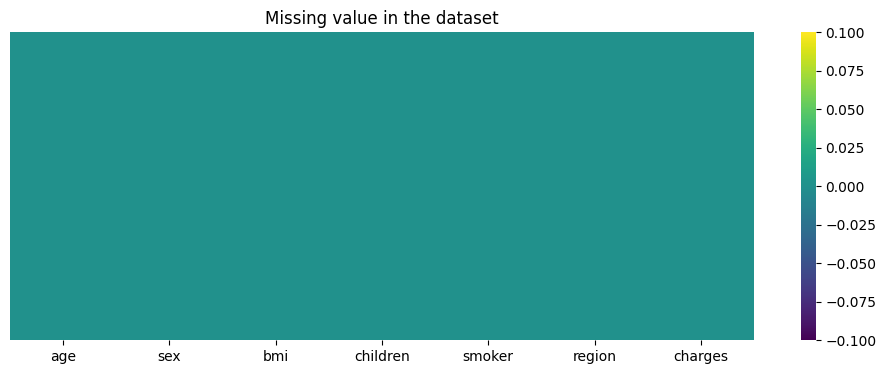

In [11]:
# missing values in the dataset
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

In [12]:
# other way
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
# No Missing Values


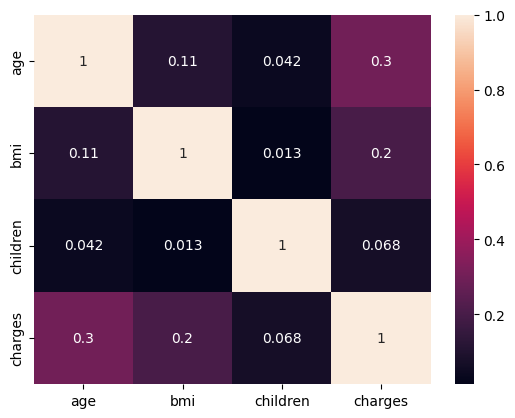

In [14]:
# correlation plot

sns.heatmap(df.corr(numeric_only=True), annot= True);

In [15]:
#In terms of numerical columns Age,BMI is highly correlated with Charges Column

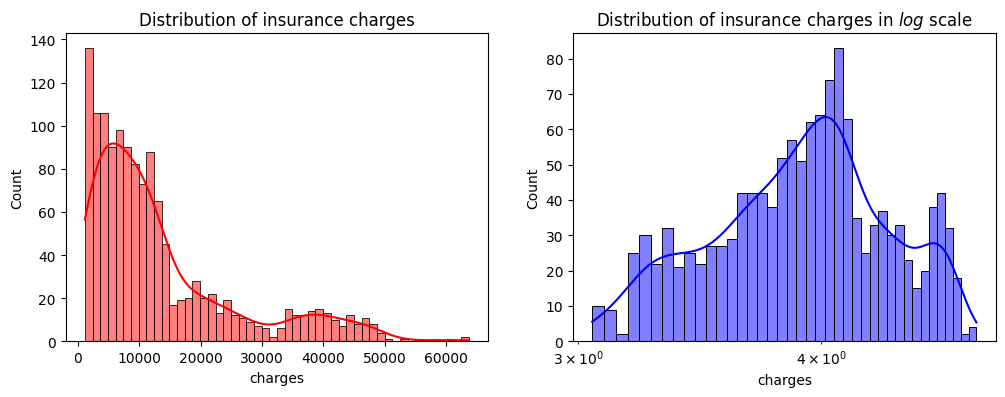

In [16]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(df['charges'],bins=50,color='r',kde=True)
plt.title('Distribution of insurance charges')

plt.subplot(1,2,2)
sns.histplot(np.log10(df['charges']),bins=40,color='b',kde=True)
plt.title('Distribution of insurance charges in $log$ scale')
plt.xscale('log')


##### In the left plot the data is set to have a left skewness whereas when we applied the log func on the charges column the distribution became normally distributed

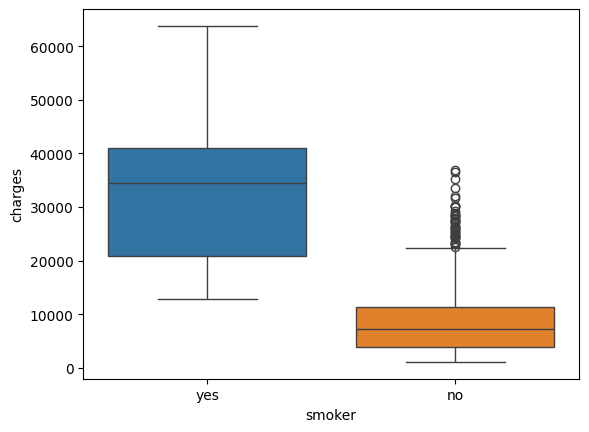

In [17]:
# lets see the effect of categorical variable over the charges column
sns.boxplot(y='charges',x='smoker',data=df,hue='smoker')
plt.show()

In [18]:
df.groupby(by='smoker')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


In [19]:
# Charges applied to the smoker category is tend to be higher as compared to the non smoker category

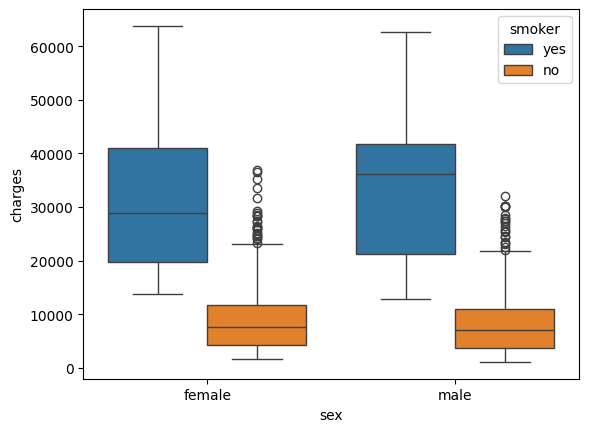

In [20]:
sns.boxplot(y='charges',x='sex',data=df,hue='smoker')
plt.show()

In [21]:
df.groupby(by='sex')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,12569.578844,11128.703801,1607.5101,4885.1587,9412.96250,14454.691825,63770.42801
male,676.0,13956.751178,12971.025915,1121.8739,4619.1340,9369.61575,18989.590250,62592.87309


In [22]:
#Median , Min and Max values are comparable
# In Male the 50th Percentile value is the maximum (high charge in smoke category)

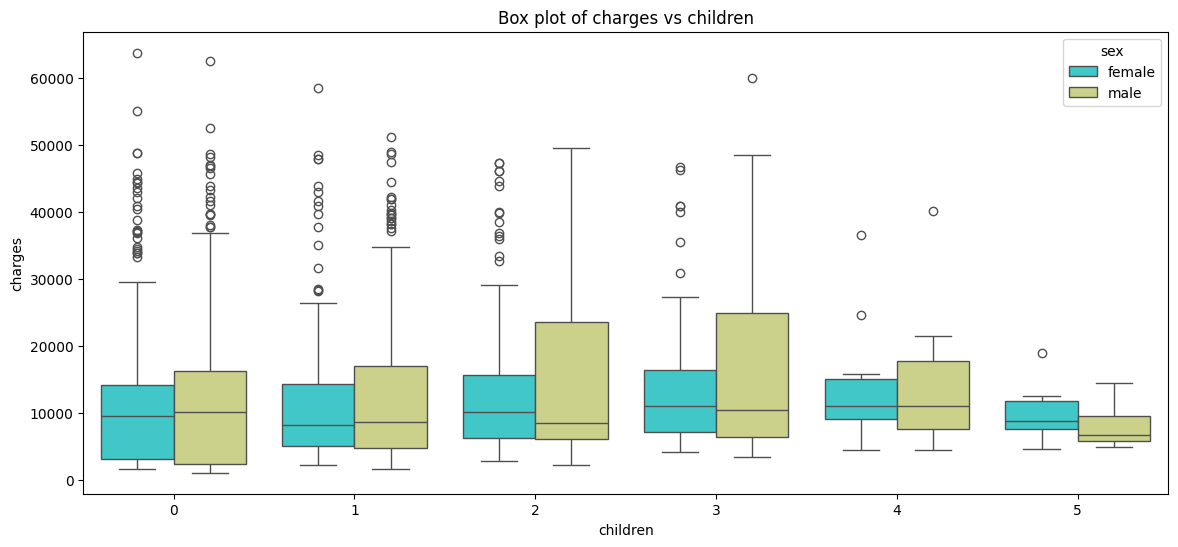

In [23]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=df,palette='rainbow')
plt.title('Box plot of charges vs children');

In [24]:
df.groupby(by='children')['charges'].describe()[['min','max','mean']]

,min,max,mean
children,,,
0,1121.8739,63770.42801,12365.975602
1,1711.0268,58571.07448,12731.171832
2,2304.0022,49577.66240,15073.563734
3,3443.0640,60021.39897,15355.318367
4,4504.6624,40182.24600,13850.656311
5,4687.7970,19023.26000,8786.035247


In [25]:
# As the number of child increases the Charges also increases

### Data Preprocessing

Encoding<br/>
Machine learning algorithms cannot work with categorical data directly, categorical data must be converted to number.<br/>

Label Encoding<br/>
One hot encoding<br/>
Dummy variable trap<br/>

$Label Encoding$ refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

A $One Hot Encoding$ is a representation of categorical variable as binary vectors.It allows the representation of categorical data to be more expresive. This first requires that the categorical values be mapped to integer values, that is label encoding. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

The $Dummy Variable$ trap is a scenario in which the independent variable are multicollinear, a scenario in which two or more variables are highly correlated in simple term one variable can be predicted from the others.

By using pandas get_dummies function we can do all above three step in line of code. We will this fuction to get dummy variable for sex, children,smoker,region features. By setting drop_first =True function will remove dummy variable trap by droping one variable and original variable.The pandas makes our life easy.

In [26]:
categorical_columns = ['sex','children', 'smoker', 'region']

In [27]:
df[categorical_columns]

,sex,children,smoker,region
0,female,0,yes,southwest
1,male,1,no,southeast
2,male,3,no,southeast
3,male,0,no,northwest
4,male,0,no,northwest
...,...,...,...,...
1333,male,3,no,northwest
1334,female,0,no,northeast
1335,female,0,no,southeast
1336,female,0,no,southwest


In [28]:
# handling sex col 
sex = pd.get_dummies(df['sex'],drop_first=True,prefix='gender')

In [29]:
sex = sex.astype(int)
sex

,gender_male
0,0
1,1
2,1
3,1
4,1
...,...
1333,1
1334,0
1335,0
1336,0


In [30]:
children = pd.get_dummies(df['children'],drop_first=True,prefix='Child Count')

In [31]:
children = children.astype(int)
children

,Child Count_1,Child Count_2,Child Count_3,Child Count_4,Child Count_5
0,0,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
1333,0,0,1,0,0
1334,0,0,0,0,0
1335,0,0,0,0,0
1336,0,0,0,0,0


In [32]:
Smoker = pd.get_dummies(df['smoker'],drop_first=True,prefix='Smoker')
Smoker = Smoker.astype(int)
Smoker

,Smoker_yes
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [34]:
region = pd.get_dummies(df['region'],drop_first=True,prefix='Region')
region = region.astype(int)
region

,Region_northwest,Region_southeast,Region_southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [36]:
df = pd.concat([df,sex,children,Smoker,region],axis=1)

In [37]:
df.head()

,age,sex,bmi,children,smoker,region,charges,gender_male,Child Count_1,Child Count_2,Child Count_3,Child Count_4,Child Count_5,Smoker_yes,Region_northwest,Region_southeast,Region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,0,0,0,0,1,0,0


In [38]:
# now dropping the original columns
df.drop(columns = ['sex','children','smoker','region'],inplace=True)

In [40]:
df.head()

,age,bmi,charges,gender_male,Child Count_1,Child Count_2,Child Count_3,Child Count_4,Child Count_5,Smoker_yes,Region_northwest,Region_southeast,Region_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0


In [41]:
# Now all the values are of Numerical Type

In [42]:
# As we saw that the charges column was left skewed and on applying the log transformation there it becamre normally distributed
df['charges'] = np.log(df['charges'])

In [45]:
df.charges[:5]

0    9.734176
1    7.453302
2    8.400538
3    9.998092
4    8.260197
Name: charges, dtype: float64

## Data Splitting

In [46]:
from sklearn.model_selection import train_test_split
X = df.drop('charges',axis=1) # Independet variable
y = df['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [47]:
X_train.shape,y_train.shape

((936, 12), (936,))

In [48]:
X_test.shape,y_test.shape

((402, 12), (402,))

In [49]:
import statsmodels.api as sm

In [50]:
x_train_sm = sm.add_constant(X_train)

In [51]:
lr_model = sm.OLS(y_train,x_train_sm)

In [52]:
lr_model = lr_model.fit()

In [53]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     249.6
Date:                Tue, 21 Jan 2025   Prob (F-statistic):          8.08e-280
Time:                        14:01:59   Log-Likelihood:                -569.80
No. Observations:                 936   AIC:                             1166.
Df Residuals:                     923   BIC:                             1229.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.0592      0.087     80.767      0.000       6.888       7.231
age                  0.0331      0.001     31.725      0.000       0.031       0.035
bmi                  0.0135      0.002      5.471      0.000       0.009       0.018
gender_male         -0.0678      0.030     -2.296      0.022      -0.126      -0.010
Child Count_1        0.1495      0.037      4.006      0.000       0.076       0.223
Child Count_2        0.2729      0.042      6.517      0.000       0.191       0.355
Child Count_3        0.2441      0.049      5.000      0.000       0.148       0.340
Child Count_4        0.5233      0.114      4.582      0.000       0.299       0.747
Child Count_5        0.4660      0.118      3.935      0.000       0.234       0.698
Smoker_yes           1.5505      0.036     42.656      0.000       1.479       1.622
Region_northwest    -0.0558      0.042     -1.340      0.181      -0.138       0.026
Region_southeast    -0.1466      0.042     -3.510      0.000      -0.229      -0.065
Region_southwest    -0.1335      0.043     -3.132      0.002      -0.217      -0.050
==============================================================================
Omnibus:                      325.584   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1150.109
Skew:                           1.667   Prob(JB):                    1.81e-250
Kurtosis:                       7.286   Cond. No.                         427.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
y_train_pred = lr_model.predict(x_train_sm)

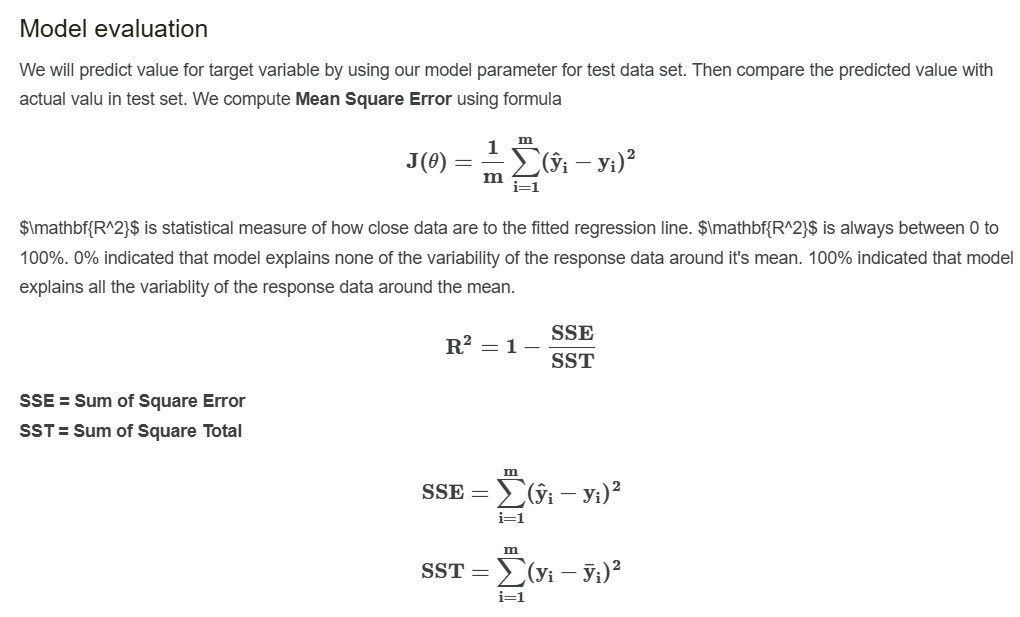

In [55]:
display(Image(r"F:\IIITBangloreAIML\7. Linear Regression Using Python\ClassLinearRegressionComplete\LR2.jpg"))

In [56]:
#R Squared value came out to be 76 percent which is ok for the small dataset

### Residuals analysis on training data

In [57]:
training_residuals = y_train - y_train_pred

<Axes: ylabel='Count'>

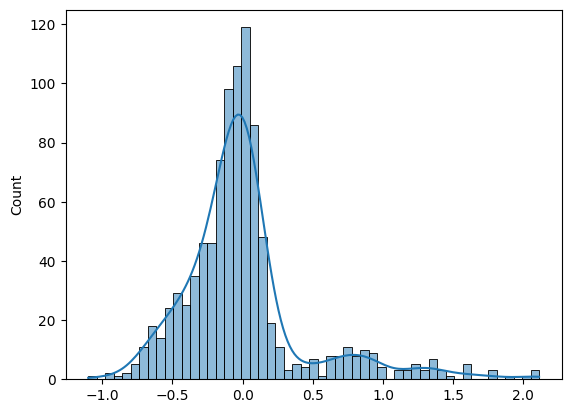

In [59]:
sns.histplot(training_residuals,kde=True)

In [60]:
# Normally Distributed 

In [61]:
x_test_sm = sm.add_constant(X_test)

In [62]:
y_test_pred = lr_model.predict(x_test_sm)

In [63]:
testing_residuals = y_test - y_test_pred

<Axes: ylabel='Count'>

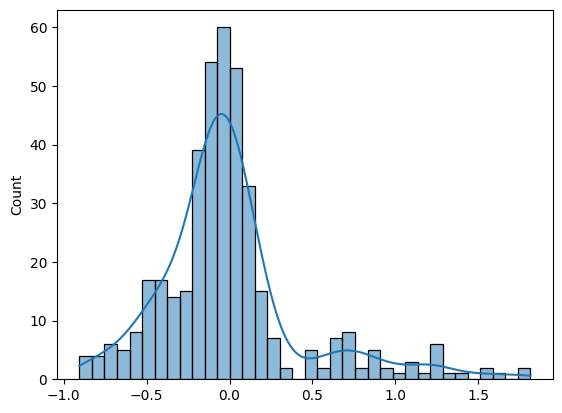

In [64]:
sns.histplot(testing_residuals,kde=True)

In [65]:
# This is also normally distributed
from sklearn.metrics import r2_score
print("R2 Score value for test data is : ",r2_score(y_test,y_test_pred))

R2 Score value for test data is :  0.7795687545055358


## Bike Sharing Company Assignment